In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy.io

In [209]:
def pyLMS(filename, domain):
    '''
    Open acquisition .mat files saved from LMS Testlab
    '''
    mat = scipy.io.loadmat(filename)
    
    if domain == 'Time':
        
        ty = 'Signal'
        x_mag = 'Time'
        
        x = np.ravel(mat[ty]['x_values'])
        x_start = x[0][0][0][0][0][0]
        x_step = x[0][0][0][1][0][0]
        x_numbers = x[0][0][0][2][0][0]
        x_unit = x[0][0][0][3][0][0][0][0]
        x_vect = np.linspace(x_start, x_numbers * x_step, x_numbers)
        
        y = np.ravel(mat[ty]['y_values'])
        y_unit = y[0][0][0][1][0][0][0][0]
        y_conversion = y[0][0][0][1][0][0][1][0][0][1][0][0]
        y_vect = np.ravel(y[0][0][0][0]) * y_conversion 
        
        if y_unit == 'g':
            y_mag = 'Acceleration'
        elif y_unit == 'N':
            y_mag = 'Force'
        elif y_unit == 'Pa':
            y_mag = 'Pressure' 
        else:
            y_unit = 'Amplitude' 
            
    elif domain == 'PSD':
        
        ty = 'PSD'
        x_mag = 'Frequency'
        
        x = np.ravel(mat[ty]['x_values'])
        x_start = x[0][0][0][0][0][0]
        x_step = x[0][0][0][1][0][0]
        x_numbers = x[0][0][0][2][0][0]
        x_unit = x[0][0][0][3][0][0][0][0]
        x_vect = np.linspace(x_start, x_numbers * x_step, x_numbers)
        
        y = np.ravel(mat[ty]['y_values'])
        y_unit = y[0][0][0][1][0][0][0][0]
        y_conversion = y[0][0][0][1][0][0][1][0][0][1][0][0]
        y_vect = np.ravel(y[0][0][0][0]) * y_conversion 
        
        y_mag = 'Power Spectral Density'
        
        
    elif domain == 'Octave':
        
        ty  = 'FrequencySpectrum'   
        x_mag = 'Frequency'
       
        fcentre = np.round(10**(np.arange(1,50,1) * 0.1),5)
        
        x = np.ravel(mat[ty]['x_values'])
        x_start = np.round(x[0][0][0][0][0][0],5)
        x_numbers = x[0][0][0][2][0][0]
        x_unit = x[0][0][0][1][0]
        index = np.where(fcentre==start)[0][0]
        x_vect = np.take(fcentre,np.arange(index,index+x_numbers))
        
        y = np.ravel(mat[ty]['y_values'])
        y_unit = y[0][0][0][1][0][0][0][0]
        y_conversion = y[0][0][0][1][0][0][1][0][0][1][0][0]
        y_vect = np.ravel(y[0][0][0][0]) * y_conversion 
        
        z = np.ravel(mat[ty]['function_record'])[0][0][0][0][0]
        y_mag = 'Amplitude '+ z
        
    data = {'x' : x_vect, 'y' : y_vect}
    units = {'x' : x_unit, 'y' : y_unit}
    mags = {'x' : x_mag, 'y' : y_mag}
    out = {'signals': data, 'units': units,'mags': mags}
    
    return  out

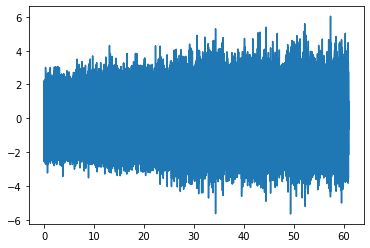

In [188]:
data = pyLMS('data/microfono.mat', 'Time')
plt.plot(data['signals']['x'], data['signals']['y'])

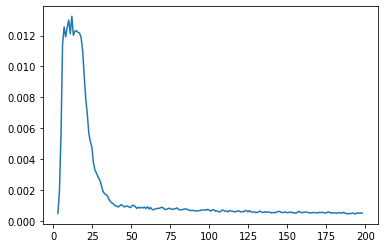

In [189]:
data = pyLMS('data/psd.mat', 'PSD')
plt.plot(data['signals']['x'], data['signals']['y'])

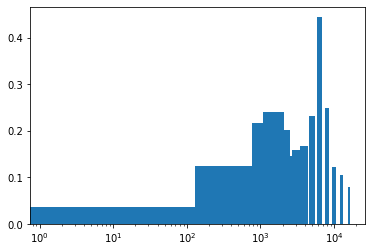

In [212]:
%matplotlib inline
data = pyLMS('data/terzi_ottava.mat', 'Octave')
plt.bar(data['signals']['x'],data['signals']['y'], width = 1000)
plt.xscale('log')

In [213]:
data['mags']

{'x': 'Frequency', 'y': 'Amplitude RMS'}